In [ ]:
# Austin Diamond

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## NN For Classification

## Example: Acceptance of Personal Loan

In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/gchoi/Dataset/master/UniversalBank.csv'

In [ ]:
bank_df = pd.read_csv(url)
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
bank_df.PersonalLoan.unique()

array([0, 1])

In [ ]:
# Define our X and y
X = bank_df.drop(['ID', 'PersonalLoan', 'ZIP Code'], axis=1)
y = bank_df.PersonalLoan

In [ ]:
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [ ]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# normalize feature matrix
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# fit our scaler
scaler.fit(X_train)

StandardScaler()

In [ ]:
# scale our data X
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train NN
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()

In [ ]:
# Grid search for NN paramters
param_grid = {
    'hidden_layer_sizes': [(10, 30, 10), (20, 50, 20)],
    'activation': ['tanh', 'relu']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, param_grid=param_grid)

In [ ]:
clf.fit(X_train_scaled, y_train)

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [(10, 30, 10), (20, 50, 20)]})

In [ ]:
# review grid results
pd.DataFrame(clf.cv_results_).sort_values('rank_test_score')[['param_activation','param_hidden_layer_sizes', 'mean_test_score', 'rank_test_score']]

,param_activation,param_hidden_layer_sizes,mean_test_score,rank_test_score
0,tanh,"(10, 30, 10)",0.978857,1
1,tanh,"(20, 50, 20)",0.978000,2
2,relu,"(10, 30, 10)",0.977143,3
3,relu,"(20, 50, 20)",0.973714,4


In [ ]:
clf.best_estimator_

MLPClassifier(activation='tanh', hidden_layer_sizes=(10, 30, 10))

In [ ]:
# create our prediction
y_pred = clf.predict(X_test_scaled)

In [ ]:
# evaluate classifier performance
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.91      0.90      0.90       157

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



Text(0.5, 1.0, 'ROC Curve')

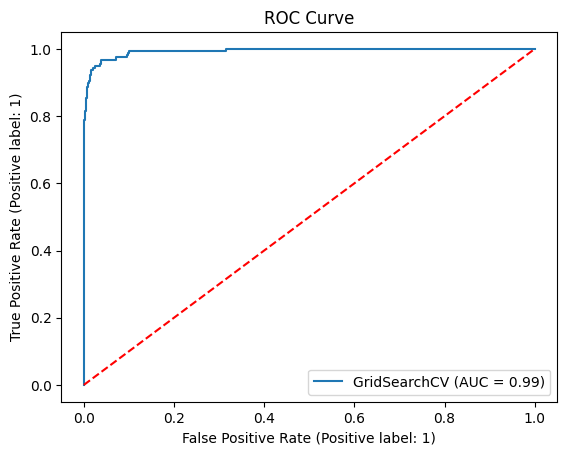

In [ ]:
# display roc curve
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

nn_disp = RocCurveDisplay.from_estimator(clf, X_test_scaled, y_test)
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.title('ROC Curve')

## NN For Regression

In [ ]:
url='https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'

In [ ]:
housing_df = pd.read_csv(url)

In [ ]:
housing_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# define X and y
X = housing_df.drop(['medv'], axis=1)
y = housing_df.medv

In [ ]:
# split training and testing data sets
# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# normalize feature matrix
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# fit our scaler
scaler.fit(X_train)

StandardScaler()

In [ ]:
# scale our data X
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPRegressor
# build MLPRegressor
mlp_reg = MLPRegressor(
    hidden_layer_sizes= (50, 100, 50),
    activation = 'relu',
    solver = 'adam'
)

In [ ]:
# fit mlp regressor
mlp_reg.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(50, 100, 50))

In [ ]:
# predict test data
y_pred = mlp_reg.predict(X_test_scaled)

In [ ]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

In [ ]:
results_df.head(10)

,Actual,Predicted
173,23.6,26.426011
274,32.4,34.195441
491,13.6,17.095435
72,22.8,26.139331
452,16.1,16.218304
76,20.0,20.691953
316,17.8,15.292335
140,14.0,12.519485
471,19.6,27.078848
500,16.8,17.642401


<Axes: >

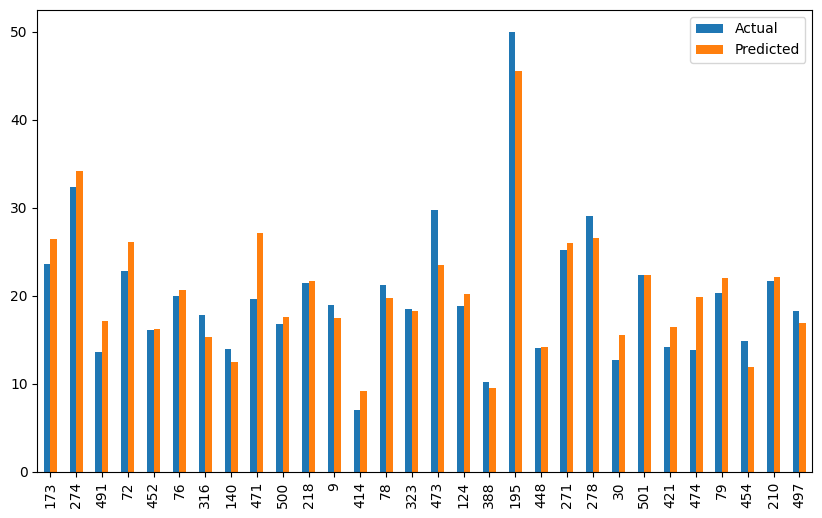

In [ ]:
# visualize the results
results_df.head(30).plot(kind='bar', figsize=(10,6))

In [ ]:
# calculate performance regression metrics
score_r2 = mlp_reg.score(X_test_scaled, y_test)
print(f'MLP Regressor R2 score = {score_r2:.2f}')

MLP Regressor R2 score = 0.85


In [ ]:
from sklearn import metrics
import numpy as np

In [ ]:
print(f'Mean Squared Error is {metrics.mean_squared_error(y_test, y_pred):.1f}')
print(f'Root Mean Squared Error is {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.1f}')

Mean Squared Error is 10.9
Root Mean Squared Error is 3.3
